After `pip install tensorflow[and-cuda] && pip install --upgrade tensorflow`

In [1]:
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal, Orthogonal, GlorotUniform

2025-10-20 01:21:04.065375: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-20 01:21:04.138447: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
# Generate synthetic time series data (like stock prices)
t = np.linspace(0, 200, 2000)

# Create a sine wave with trend
data = np.sin(t / 10) + t / 100 + np.random.normal(0.0, 0.1, len(t))

# Prepare sequences for forecasting
sequence_length = 40
X, y = [], []

for i in range(len(data) - sequence_length):
    X.append(data[i:i + sequence_length])
    y.append(data[i + sequence_length])

X = np.array(X).reshape(-1, sequence_length, 1)
y = np.array(y)

# Split into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model for time series forecasting
model = Sequential([
    LSTM(
        64, 
        activation="relu",
        input_shape=(sequence_length, 1),
        kernel_initializer=Orthogonal(),      # Better for RNNs
        recurrent_initializer=Orthogonal(),   # For recurrent weights
        bias_initializer="zeros",
    ),
    Dense(
        32, 
        activation="relu",
        kernel_initializer=HeNormal(),        # Good for ReLU
    ),
    Dense(
        1,
        kernel_initializer=GlorotUniform()    # Default for output
    ),
])

model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mae"])

2025-10-20 01:21:08.455602: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1760894468.455708  597868 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22248 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:3b:00.0, compute capability: 8.6
/home/xudc/.local/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Train
with tf.device("/GPU:0"):
    history = model.fit(
        X_train,
        y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        verbose=2,
    )

Epoch 1/100


2025-10-20 01:21:10.632920: I external/local_xla/xla/service/service.cc:163] XLA service 0x47b36c50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-20 01:21:10.632968: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-10-20 01:21:10.676941: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-20 01:21:10.878235: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 90300
2025-10-20 01:21:10.934873: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-20 01:21:10.934908: I exter

40/40 - 9s - 215ms/step - loss: 0.2840 - mae: 0.3756 - val_loss: 0.0545 - val_mae: 0.1974
Epoch 2/100
40/40 - 0s - 12ms/step - loss: 0.0167 - mae: 0.1025 - val_loss: 0.0510 - val_mae: 0.1796
Epoch 3/100
40/40 - 0s - 12ms/step - loss: 0.0128 - mae: 0.0894 - val_loss: 0.1279 - val_mae: 0.2838
Epoch 4/100
40/40 - 1s - 13ms/step - loss: 0.0125 - mae: 0.0883 - val_loss: 0.0959 - val_mae: 0.2552
Epoch 5/100
40/40 - 0s - 12ms/step - loss: 0.0130 - mae: 0.0901 - val_loss: 0.0565 - val_mae: 0.1945
Epoch 6/100
40/40 - 1s - 13ms/step - loss: 0.0126 - mae: 0.0890 - val_loss: 0.0472 - val_mae: 0.1749
Epoch 7/100
40/40 - 1s - 13ms/step - loss: 0.0124 - mae: 0.0883 - val_loss: 0.0484 - val_mae: 0.1793
Epoch 8/100
40/40 - 0s - 11ms/step - loss: 0.0125 - mae: 0.0885 - val_loss: 0.0302 - val_mae: 0.1386
Epoch 9/100
40/40 - 0s - 12ms/step - loss: 0.0123 - mae: 0.0877 - val_loss: 0.0336 - val_mae: 0.1476
Epoch 10/100
40/40 - 0s - 11ms/step - loss: 0.0124 - mae: 0.0882 - val_loss: 0.0215 - val_mae: 0.1165


In [6]:
# Evaluate on test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Make predictions
y_pred = model.predict(X_test, verbose=0)

Test Loss: 0.0119
Test MAE: 0.0858


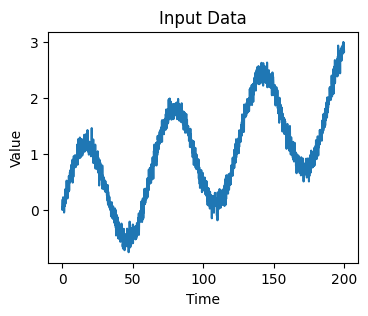

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.plot(t, data)
ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.set_title("Input Data")
plt.show()

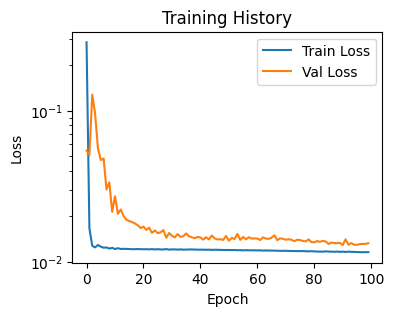

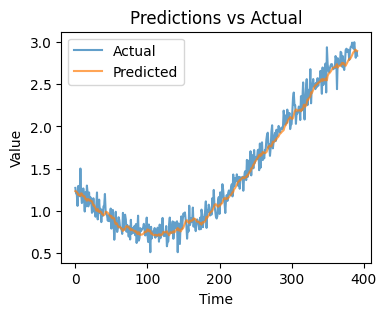

In [8]:
# Plot results

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.plot(history.history["loss"], label="Train Loss")
ax.plot(history.history["val_loss"], label="Val Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.legend()
ax.set_yscale("log")
ax.set_title("Training History")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.plot(y_test, label="Actual", alpha=0.7)
ax.plot(y_pred, label="Predicted", alpha=0.7)
ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.legend()
ax.set_title("Predictions vs Actual")
plt.show()